<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

All cells must be suitably commented / documented.

## Wholesale Market Customer Classification using AIML Models

### Read Dataset

In [233]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split                    #import test_split from sklearn
from sklearn.linear_model import LogisticRegression                     #import logistic regression
from sklearn.metrics import classification_report, confusion_matrix     #importin classification report and confusion matrix
from sklearn import metrics                                             #import metrices from sklearn
from sklearn.tree import DecisionTreeClassifier                         #import decision tree from sklearn tree
from sklearn.svm import SVC                                             #import SVC from support vector machine 
from sklearn.model_selection import GridSearchCV                        #import gridsearchcv for tuning
from sklearn.cluster import KMeans                                      #import Kmeans cluster
from sklearn import tree                                                #import tree from sklearn


# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("Wholesale customers data.csv")

In [234]:
display(data.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [235]:
# Display a description of the dataset
display(data.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Check for Missing Data

In [236]:
# Load the wholesale customers dataset
try:
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 8 features each.


In [237]:
data.info() # checks for missing data and print its types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


No missing data found by the above results.

### Exploratory Analysis

<AxesSubplot:>

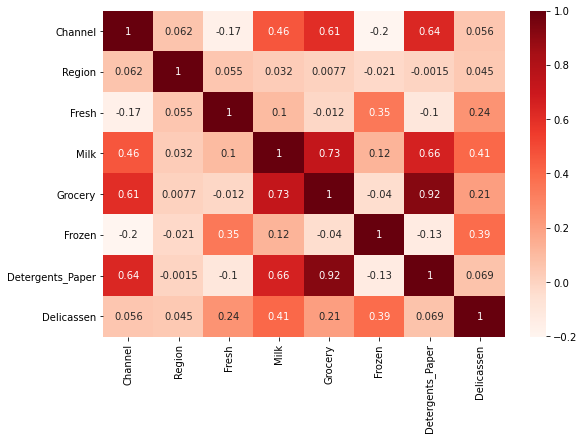

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns                                                   #import seaborn

plt.figure(figsize=(9,6))                            #resizing the matrix
sns.heatmap(data.corr(),annot=True,cmap="Reds")     #plotting correlation matrix

Diagram shows the exploratory analysis considering each value.

### Handle Categorical Values

In [239]:
p=data['Channel']                     #preparing the label
p=pd.DataFrame(p)

There are no other categorical values to handle

### Split Data for Training and Testing

In [240]:
# used for kmeans exclusively
x_train=data.iloc[:,0:].copy()

In [241]:
data.drop('Channel',inplace = True,axis=1)
X_train, X_test, y_train, y_test = train_test_split(data,p,test_size=0.30)    #spliting the data into test data and train data

### Apply different Classification Algorithms and tune them

#### K-Means using RandomizedSearch tuning of hyperparameters

In [242]:
from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [243]:
#Hyperparameter tuning done for K Means
kmeans = KMeans()
parameters={
    'n_clusters': range(1,4,1),
    'init': ['k-means++', 'random'],
    'max_iter': range(1,800,10),
    'n_init': range(1,30,1),
    'algorithm': ['auto', 'full','elkan']
    }
kmeans = RandomizedSearchCV(kmeans,parameters,n_iter=15)
kmeans.fit(x_train)
grid_parm_kmeans=kmeans.best_params_
print(grid_parm_kmeans)

{'n_init': 25, 'n_clusters': 3, 'max_iter': 481, 'init': 'random', 'algorithm': 'full'}


In [244]:
#K-Means Clustering after Hypertuning ========================================================================

kmeans = KMeans(**grid_parm_kmeans)
kmeans.fit(x_train)
kmeans.labels_

print(x_train.shape)

print(silhouette_score(x_train, kmeans.labels_))

(440, 8)
0.4783511411368133


### Logistic Regression

In [245]:
logisticmodel = LogisticRegression(max_iter=1000)        
logisticmodel.fit(X_train,y_train)       #fitting the train data and training the model

LogisticRegression(max_iter=1000)

In [246]:
logistic_predictions = logisticmodel.predict(X_test)        #predicting the label

### Decision Tree

In [247]:
# max_depth refers to the level in tree
model = DecisionTreeClassifier(max_depth = 8,random_state = 0,criterion = "entropy")   #initializing the classifier

In [248]:
model.fit(X_train, y_train)                           # training model

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [249]:
decision_predictions=model.predict(X_test)   # predicting output values for corresponding test data

### Get performance metrics for all the applied classifiers

Kmeans Accuracy Score

In [250]:
#for Kmeans
print(silhouette_score(x_train, kmeans.labels_))
kmeans_accuracy = silhouette_score(x_train, kmeans.labels_)

0.4783511411368133


Logistic Regression performance metrics

In [251]:
print(classification_report(y_test,logistic_predictions))  # printing classification report
Logistic_Accuracy=metrics.accuracy_score(y_test,logistic_predictions)    #storing the accuaracy of the logistic algorithm

              precision    recall  f1-score   support

           1       0.95      0.94      0.94        97
           2       0.83      0.86      0.85        35

    accuracy                           0.92       132
   macro avg       0.89      0.90      0.89       132
weighted avg       0.92      0.92      0.92       132



Decision Tree performance metrics

In [252]:
print(classification_report(y_test,decision_predictions))      #printing the classification report
Decision_Accuracy=metrics.accuracy_score(y_test,decision_predictions) #storing the Accuracy of Decision tree

              precision    recall  f1-score   support

           1       0.95      0.96      0.95        97
           2       0.88      0.86      0.87        35

    accuracy                           0.93       132
   macro avg       0.92      0.91      0.91       132
weighted avg       0.93      0.93      0.93       132



### Visually compare the performance of all classifiers

Confusion Matrix of Kmeans

In [253]:
k=p['Channel']                                        #preparing the Channel
k=pd.DataFrame(k)                                   #coverting into dataframe
k["Channel"].replace({1: 0, 2: 1,3:2}, inplace=True)  #replacing the column values
z=k['Channel']                                        #copying the variable
clusters=kmeans.labels_    #adding the labels to the variable
z                                                   #previewing

0      1
1      1
2      1
3      0
4      1
      ..
435    0
436    0
437    1
438    0
439    0
Name: Channel, Length: 440, dtype: int64

<AxesSubplot:>

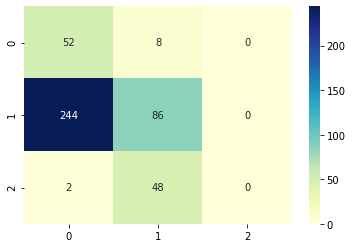

In [254]:
cnf_matrix=confusion_matrix(clusters, z)                         #getting the predictions in the form of confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=True,cmap='YlGnBu')   # creating heatmap for confusion matrix

Confusion Matrix for Logistic Regression

<AxesSubplot:>

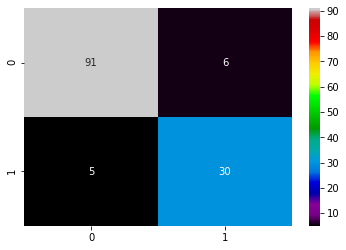

In [255]:
#logistic
cnf_matrix=confusion_matrix(y_test,logistic_predictions)                         #getting the predictions in the form of confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=True,cmap='nipy_spectral')   # creating heatmap for confusion matrix

Confusion Matrix for Decision Tree

<AxesSubplot:>

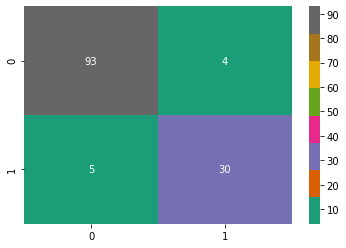

In [256]:
#Decision Tree
cnf_matrix=confusion_matrix(y_test,decision_predictions)                # getting the predictions in the form of confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cbar=True,cmap='Dark2')   # creating heatmap for confusion matrix

### Accuracy Score Comparision

In [257]:
Accuracy=[Logistic_Accuracy,Decision_Accuracy, kmeans_accuracy]                  #storing all the accuracy into list
Models=['Logistic Regression','Decision Tree','Kmeans Clustering']        #Storing the names of the classifiers in the list
compare=pd.DataFrame()                                   #initializing a dataframe
compare['Classifier Name']=Models                        #adding models list to the dataframe
compare['Accuracy']=Accuracy                             #adding accuracy column to the dataframe
compare                                                  #preveiwing

,Classifier Name,Accuracy
0,Logistic Regression,0.916667
1,Decision Tree,0.931818
2,Kmeans Clustering,0.478351


In [258]:
score=sns.light_palette('green',as_cmap=True)                    #setting style to the cmamp
s=compare.style.background_gradient(cmap=score)                 #previeing the dataframe
s

,Classifier Name,Accuracy
0,Logistic Regression,0.916667
1,Decision Tree,0.931818
2,Kmeans Clustering,0.478351


In [259]:
Accuracies=np.array(Accuracy)                            #initializing the numpy array and storing the accuracy data in it
Accuracies=np.multiply(Accuracies,100)                   #converting into percentage
Accuracies=np.round(Accuracies,2)                        #rounding to 2 decimal points

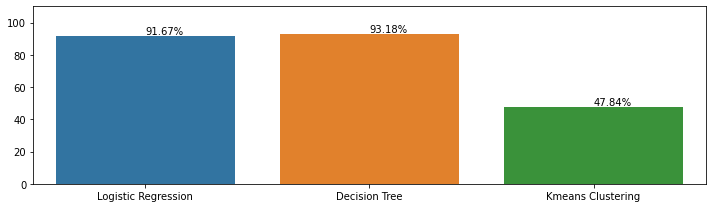

In [260]:
plt.figure(figsize=(10,3))                                                         #resizing the graph
sns.barplot(x=Models,y=Accuracies)                                                 #plotting barplot
plt.ylim((0,110))                                                                  #Setting ylimit
for index,data in enumerate(Accuracies):                                           #entering into for loop for adding text to barplot
    plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))      #adding text
plt.tight_layout()                                                         
plt.show()                                                                

### Summary

By the above result, The most suited algorithm for classification is Decision Tree Classifier among the used algorithms. This algorithm has the highest accuracy score than other algorithms. As Kmeans is a clustering algorithm it normally will have the less accuracy score as compared to others. The main advantage of logistic regression is to avoid confounding effects by analyzing the association of all variables together although it misses some data and got less than decision tree algorithm. Target value can be either categorical value or continuous value. The classification process is easy to visualize and understand and makes it the top most suitable algorithm for classification of this dataset with its main advantage, the original data can include both categorical and continuous figures.